In [1]:
## look to try gradient boosting 

## need to find naive model testing 

## 1 split cleaned data into test, 

## train and test model 

## ensemble learning ??


## figure out validation score 

In [2]:
## starting model refinement and testing in this notebook 

# Import our dependencies
import pandas as pd
import os 


# Read in our ramen data
all_homes_df= pd.read_csv("../Resources/housing_b4_encoding.csv")
# Read in our ramen data
all_homes_df
# # Print out the Country value counts
# country_counts = ramen_df.Country.value_counts()
# country_counts

,Unnamed: 0,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,27322,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,...,85912.0,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0
17612,27323,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,...,35891.0,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0
17613,27324,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,...,124700.0,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0
17614,27326,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0


In [3]:
for column in all_homes_df.columns:
    print(f"column{column} has {all_homes_df[column].isnull().sum()} null values")

columnUnnamed: 0 has 0 null values
columnRegionID has 0 null values
columnSizeRank has 0 null values
columnRegionName has 0 null values
columnState has 0 null values
column2016-02-29 has 425 null values
column2016-03-31 has 416 null values
column2016-04-30 has 403 null values
column2016-05-31 has 382 null values
column2016-06-30 has 356 null values
column2016-07-31 has 342 null values
column2016-08-31 has 331 null values
column2016-09-30 has 319 null values
column2016-10-31 has 283 null values
column2016-11-30 has 268 null values
column2016-12-31 has 255 null values
column2017-01-31 has 220 null values
column2017-02-28 has 212 null values
column2017-03-31 has 198 null values
column2017-04-30 has 188 null values
column2017-05-31 has 164 null values
column2017-06-30 has 149 null values
column2017-07-31 has 135 null values
column2017-08-31 has 122 null values
column2017-09-30 has 106 null values
column2017-10-31 has 91 null values
column2017-11-30 has 82 null values
column2017-12-31 has 7

In [4]:
len(all_homes_df)

17616

In [5]:
all_homes_df.drop_duplicates(subset="RegionName",keep = "first", inplace = True)
len(all_homes_df)

17616

<AxesSubplot:ylabel='Density'>

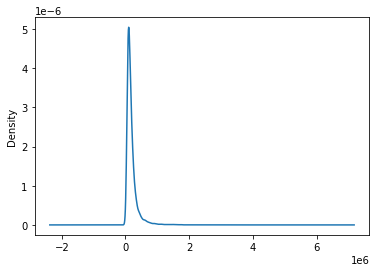

In [6]:
all_homes_df["2016-02-29"].plot.density()

<AxesSubplot:ylabel='Frequency'>

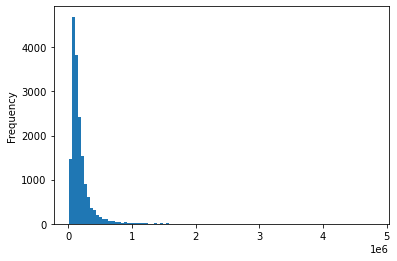

In [8]:
all_homes_df["2016-02-29"].plot(kind='hist',bins=100)

In [9]:
all_homes_df = all_homes_df.drop(columns="Unnamed: 0", axis =1)
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,85912.0,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,35891.0,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,124700.0,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0


In [10]:
all_homes_df["2016-02-29"].describe()

count    1.719100e+04
mean     1.909227e+05
std      2.145270e+05
min      1.258300e+04
25%      8.929350e+04
50%      1.367710e+05
75%      2.166985e+05
max      4.790310e+06
Name: 2016-02-29, dtype: float64

In [11]:
## run small city now to shrink data set again 
small_cty = all_homes_df.loc[(all_homes_df["2016-02-29"] < 90000)].index
small_cty

Int64Index([   22,    25,    49,    73,    90,   119,   129,   139,   152,
              181,
            ...
            17583, 17589, 17590, 17591, 17593, 17601, 17603, 17605, 17609,
            17614],
           dtype='int64', length=4380)

In [12]:
## can come back and remove small city from all city to see if that decreases tail in data 
len(small_cty)

4380

In [13]:
# # factorize to map each category to a different interger
# states_cat = all_homes_df['State']
# states_cat_encoded, states_categories = states_cat.factorize()
# states_cat_encoded[:10]

In [14]:
# states_df
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
all_homes_df['states_Types_Cat'] = labelencoder.fit_transform(all_homes_df['State'])
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,states_Types_Cat
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0,34
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0,4
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0,43
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0,14
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0,38
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0,49
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0,32
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0,25


In [15]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(all_homes_df[['states_Types_Cat']]).toarray())
# merge with main df bridge_df on key values
all_homes_df = all_homes_df.join(enc_df)
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,41,42,43,44,45,46,47,48,49,50
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
states_cat_df= all_homes_df[["states_Types_Cat","State"]]
states_cat_df

,states_Types_Cat,State
0,34,NY
1,4,CA
2,43,TX
3,14,IL
4,43,TX
...,...,...
17611,38,PA
17612,49,WV
17613,32,NM
17614,25,MS


In [17]:
## removing types cat as onehot encoding is now done. 

all_homes_df.drop(columns="states_Types_Cat",inplace=True)
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,41,42,43,44,45,46,47,48,49,50
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
## creating and removing name columns to feed into KNN imputer 

name_columns= all_homes_df[['RegionID', 'SizeRank', 'RegionName', 'State']]
print(type(name_columns))

<class 'pandas.core.frame.DataFrame'>


In [19]:
## pring name columns to be attached back later 
all_homes_df = all_homes_df.drop(name_columns, axis =1)
all_homes_df

,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,41,42,43,44,45,46,47,48,49,50
0,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,568673.0,571806.0,574748.0,577918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,628777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,165519.0,166004.0,166277.0,167231.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,223935.0,224813.0,226072.0,227726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,155328.0,155861.0,156324.0,157268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,87588.0,87114.0,86249.0,85047.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,107167.0,107765.0,109617.0,110413.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,65800.0,65968.0,65759.0,65821.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# columns = all_homes_df.columns.tolist()
# columns

In [21]:
## use KNN imputer 
from sklearn.impute import KNNImputer
KNN = KNNImputer()
KNN.fit(all_homes_df)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNNImputer()

In [22]:
X = KNN.transform(all_homes_df)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [23]:
num_housing_df_transformed = pd.DataFrame(X, columns = all_homes_df.columns)
num_housing_df_transformed

,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,41,42,43,44,45,46,47,48,49,50
0,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,568673.0,571806.0,574748.0,577918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,628777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,165519.0,166004.0,166277.0,167231.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,223935.0,224813.0,226072.0,227726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,155328.0,155861.0,156324.0,157268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,87588.0,87114.0,86249.0,85047.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,36601.8,36675.4,36782.4,36873.6,36797.8,36778.2,36684.4,36786.2,36844.2,36984.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,107167.0,107765.0,109617.0,110413.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,65800.0,65968.0,65759.0,65821.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Define features set -- using 2020-03 as y for now 
X = num_housing_df_transformed.copy()
X = X.drop("2020-03-31", axis=1)
X.head()

,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,41,42,43,44,45,46,47,48,49,50
0,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,568673.0,571806.0,574748.0,577918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,628777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,165519.0,166004.0,166277.0,167231.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,223935.0,224813.0,226072.0,227726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,155328.0,155861.0,156324.0,157268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Define target vector y 
y = num_housing_df_transformed["2020-03-31"].values.reshape(-1, 1)
print(y[:5])
print(y.shape)
print(type(y))

[[652307.]
 [752508.]
 [191907.]
 [249152.]
 [187718.]]
(17616, 1)
<class 'numpy.ndarray'>


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [28]:
X_train_scaled[:5]

array([[-2.77657461e-01, -2.80200670e-01, -2.82704014e-01,
        -2.82406947e-01, -2.80526962e-01, -2.84617347e-01,
        -2.91267508e-01, -2.98522524e-01, -2.99844437e-01,
        -3.00802106e-01, -3.01690490e-01, -3.03412690e-01,
        -3.02125497e-01, -2.97181064e-01, -2.90808341e-01,
        -2.87867439e-01, -2.87699926e-01, -2.86571951e-01,
        -2.84978628e-01, -2.83458960e-01, -2.85124027e-01,
        -2.84587529e-01, -2.81156860e-01, -2.77444617e-01,
        -2.73818348e-01, -2.74640030e-01, -2.76620127e-01,
        -2.78500959e-01, -2.76956461e-01, -2.71666782e-01,
        -2.66790550e-01, -2.64071774e-01, -2.60853681e-01,
        -2.59538246e-01, -2.58975672e-01, -2.58486385e-01,
        -2.59539478e-01, -2.58912684e-01, -2.59748230e-01,
        -2.57993761e-01, -2.58200500e-01, -2.60925316e-01,
        -2.63247345e-01, -2.63831396e-01, -2.64276362e-01,
        -2.64397659e-01, -2.65367712e-01, -2.66403887e-01,
        -2.66878315e-01, -5.00398202e-02, -1.44027785e-0

In [29]:
## fitting x and y to initial linear regression model 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred=lin_reg.predict(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [30]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test,y_pred)
lin_rmse=np.sqrt(lin_mse)
print("mse :",lin_mse)
print("rmse :",lin_rmse)

from sklearn.metrics import mean_absolute_error
lin_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",lin_MAE)

NameError: name 'np' is not defined

In [31]:
from sklearn.ensemble import RandomForestRegressor
## start with 3 trees 
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=3)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [32]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

lin_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",lin_MAE)

## rmse = 58 k with 3 decisions and 10 trees 

NameError: name 'np' is not defined

trying 100 trees insead of 10 which doesnt work very well

In [33]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=4)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [34]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

lin_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",lin_MAE)

## 4 trees almost cuts rmse in half, 

NameError: name 'np' is not defined

In [35]:
## increasing amount of trees to 100

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=4)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [36]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)

#3k improvement in SMSE 1.5k in MAE 

NameError: name 'np' is not defined

In [37]:
## increasing depth to 6

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [38]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)

## decrease in RMSE and MAE with 6 instead of 4 depth 

NameError: name 'np' is not defined

In [39]:
## seeing if 10 depth creates over fitting and increase in rmse and MAE 
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marko\.conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
